In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 300) # or 1000.
pd. set_option('display.max_rows', 300) # or 1000.

import warnings
warnings.filterwarnings("ignore")

### read and understand the data

In [2]:
df = pd.read_csv("H2HBABBA2427.csv")

In [3]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200803720,DEC systems,NaN,2020,1930612084,2020-03-06,20200306,20200306,20200311,USD,RV,1,NaN,2678.26,20200301,NAM2,1.930612e+09,1
1,U001,200769623,WAL-MAR co,2019-10-21 00:00:00,2019,1929989432,2019-10-09,20191009,20191009,20191024,USD,RV,1,NaN,30170.67,20191009,NAH4,1.929989e+09,0
2,U001,200759082,INGL us,NaN,2020,1930580131,2020-02-27,20200227,20200227,20200502,USD,RV,1,NaN,908.58,20200227,NAGD,1.930580e+09,1
3,U001,200416837,DEC associates,2019-12-02 00:00:00,2019,1930182982,2019-11-22,20191122,20191122,20191209,USD,RV,1,NaN,141.60,20191116,NAM4,1.930183e+09,0
4,U001,200769623,WAL-MAR associates,2019-10-10 00:00:00,2019,1929900899,2019-09-22,20190920,20190922,20191007,USD,RV,1,NaN,32911.15,20190922,NAH4,1.929901e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200078795,H T H corporation,2019-06-17 00:00:00,2019,1929362890,2019-05-22,20190522,20190522,20190606,USD,RV,1,NaN,1119.55,20190522,NAA8,1.929363e+09,0
49996,U001,200769623,WAL-MAR us,2019-08-28 00:00:00,2019,1929758469,2019-08-18,20190817,20190818,20190902,USD,RV,1,NaN,47687.73,20190818,NAH4,1.929758e+09,0
49997,U001,200770567,LABAT foundation,2019-02-15 00:00:00,2019,1928725095,2019-02-04,20190203,20190204,20190219,USD,RV,1,NaN,50511.83,20190204,NAA8,1.928725e+09,0
49998,U001,200769623,WAL-MAR trust,2019-11-12 00:00:00,2019,1930071561,2019-10-31,20191030,20191031,20191115,USD,RV,1,NaN,55228.25,20191031,NAH4,1.930072e+09,0


In [4]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,5.000000e+04,5.000000e+04,4.999900e+04,50000.000000
mean,2019.305740,2.011240e+09,2.019351e+07,2.019353e+07,2.019368e+07,1.0,NaN,3.237864e+04,2.019353e+07,2.011090e+09,0.200000
std,0.460725,2.781800e+08,4.499726e+03,4.483189e+03,4.472379e+03,0.0,NaN,3.952336e+04,4.482630e+03,2.761593e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,1.700000e-01,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929337e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4.875265e+03,2.019051e+07,1.929337e+09,0.000000
50%,2019.000000,1.929962e+09,2.019091e+07,2.019091e+07,2.019092e+07,1.0,NaN,1.751503e+04,2.019091e+07,1.929961e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,4.717406e+04,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,1.010291e+06,2.020052e+07,2.960636e+09,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### checking null, unique and duplicate data

In [6]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

In [7]:
df.nunique()

business_code                 6
cust_number                1071
name_customer              4166
clear_date                  389
buisness_year                 2
doc_id                    48805
posting_date                502
document_create_date        505
document_create_date.1      502
due_in_date                 550
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44339
baseline_create_date        504
cust_payment_terms           71
invoice_id                48804
isOpen                        2
dtype: int64

In [8]:
df=df.drop(columns=['area_business'])  # dropping area_business because its empty

In [9]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,5.000000e+04,5.000000e+04,4.999900e+04,50000.000000
mean,2019.305740,2.011240e+09,2.019351e+07,2.019353e+07,2.019368e+07,1.0,3.237864e+04,2.019353e+07,2.011090e+09,0.200000
std,0.460725,2.781800e+08,4.499726e+03,4.483189e+03,4.472379e+03,0.0,3.952336e+04,4.482630e+03,2.761593e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,1.700000e-01,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929337e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,4.875265e+03,2.019051e+07,1.929337e+09,0.000000
50%,2019.000000,1.929962e+09,2.019091e+07,2.019091e+07,2.019092e+07,1.0,1.751503e+04,2.019091e+07,1.929961e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,4.717406e+04,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,1.010291e+06,2.020052e+07,2.960636e+09,1.000000


### taking out null rows of clear date into main_test and keeping rest in main_train

In [10]:
main_test = df[df.clear_date.isnull()== True]
main_train = df.dropna()   #can use dropna check after results

In [11]:
main_train.shape

(39999, 18)

In [12]:
main_test.shape

(10000, 18)

In [13]:
main_train.isnull().sum().to_frame(name='NULL_LEFT')   #checking any null left in main_train data

,NULL_LEFT
business_code,0
cust_number,0
name_customer,0
clear_date,0
buisness_year,0
doc_id,0
posting_date,0
document_create_date,0
document_create_date.1,0
due_in_date,0


In [14]:
main_train.duplicated().sum()         #checking duplicates and counting them

881

In [15]:
main_test.duplicated().sum()

314

In [16]:
#looking for duplicated columns in test dataset
test_trans = main_test.T               # trasnposing the dataframe 
test_trans.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                     True
dtype: bool

In [17]:
#looking for duplicated columns in database
df_trans = main_train.T
df_trans.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                    False
dtype: bool

In [18]:
(main_train['doc_id'] == main_train['invoice_id']).sum() # Hence column 'doc_id' and 'invoice_id' are identical

39999

In [19]:
main_train = main_train.drop(columns=['doc_id'])  

In [20]:
main_test = main_test.drop(columns=['doc_id'])

In [21]:
main_train.shape , main_test.shape

((39999, 17), (10000, 17))

### corrleation check

In [22]:
df.corr()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.000000,-0.008761,0.977610,0.983173,0.989629,NaN,-0.000909,0.983706,-0.008465,0.753451
doc_id,-0.008761,1.000000,-0.006028,-0.007700,-0.010285,NaN,0.174161,-0.005162,1.000000,-0.005869
document_create_date,0.977610,-0.006028,1.000000,0.994207,0.974234,NaN,0.003021,0.993465,-0.005702,0.762551
document_create_date.1,0.983173,-0.007700,0.994207,1.000000,0.979254,NaN,0.001726,0.999252,-0.007379,0.762755
due_in_date,0.989629,-0.010285,0.974234,0.979254,1.000000,NaN,-0.001305,0.979979,-0.009965,0.753906
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0.000909,0.174161,0.003021,0.001726,-0.001305,NaN,1.000000,0.002011,0.175876,0.007266
baseline_create_date,0.983706,-0.005162,0.993465,0.999252,0.979979,NaN,0.002011,1.000000,-0.004822,0.762582
invoice_id,-0.008465,1.000000,-0.005702,-0.007379,-0.009965,NaN,0.175876,-0.004822,1.000000,-0.005641
isOpen,0.753451,-0.005869,0.762551,0.762755,0.753906,NaN,0.007266,0.762582,-0.005641,1.000000


#### Deleting unnecessary columns/irrelevant to our model

name_customer- is an unecessary column as we have customer id.

document_create_date is highly correleatd to document_create_date.1 ( i.e 0.992731 ),can check from correlation table from above

Invoice_id is unique to all and very less corelated to all columns

In [23]:
main_train = main_train.drop(columns = ['name_customer','document_create_date','invoice_id'])
main_test = main_test.drop(columns = ['name_customer','document_create_date','invoice_id'])

### Removing Constant Features

In [24]:
c = main_train.nunique() #checking for unique values in main_train
c

business_code                 6
cust_number                1016
clear_date                  389
buisness_year                 2
posting_date                423
document_create_date.1      423
due_in_date                 492
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         35708
baseline_create_date        430
cust_payment_terms           68
isOpen                        1
dtype: int64

#feature with value 1 are constant so we remove them

In [25]:
main_train = main_train.drop(columns = ['document type','posting_id','isOpen']) 
main_test = main_test.drop(columns = ['document type','posting_id','isOpen'])

In [26]:
main_train.shape, main_test.shape

((39999, 11), (10000, 11))

In [27]:
list(main_train.columns)

['business_code',
 'cust_number',
 'clear_date',
 'buisness_year',
 'posting_date',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms']

In [28]:
main_train.sort_values(by=['posting_date']).reset_index(drop=True)   #sorting values according to posting dates

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,200726979,2019-01-15 00:00:00,2019,2018-12-30,20181230,20190114,USD,111.22,20181230,NAA8
1,U001,100004536,2019-01-14 00:00:00,2019,2018-12-30,20181230,20190114,USD,119380.43,20181230,NAA8
2,U001,200769623,2019-01-09 00:00:00,2019,2018-12-30,20181230,20190114,USD,1259.34,20181230,NAH4
3,U001,200769623,2019-01-10 00:00:00,2019,2018-12-30,20181230,20190114,USD,72181.59,20181230,NAH4
4,U001,200726979,2019-01-15 00:00:00,2019,2018-12-30,20181230,20190114,USD,165.36,20181230,NAA8
...,...,...,...,...,...,...,...,...,...,...,...
39994,U001,140142846,2020-03-04 00:00:00,2020,2020-02-26,20200226,20200426,USD,40112.18,20200226,NACB
39995,U001,200734750,2020-03-20 00:00:00,2020,2020-02-26,20200226,20200313,USD,3850.68,20200226,C106
39996,U001,200759878,2020-03-13 00:00:00,2020,2020-02-27,20200227,20200313,USD,63966.18,20200227,NAH4
39997,U001,200762950,2020-03-13 00:00:00,2020,2020-02-27,20200227,20200313,USD,17377.54,20200227,NAA8


# Feature Engineering

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
main_train.dtypes       #checking datatypes of features

business_code              object
cust_number                object
clear_date                 object
buisness_year               int64
posting_date               object
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
dtype: object

In [31]:
main_train["business_code"].value_counts()   #getting count of values from business_code column

U001    36176
CA02     3152
U013      541
U002      121
U005        7
U007        2
Name: business_code, dtype: int64

In [32]:
main_train['business_code']=np.where(main_train["business_code"].isin(['U005','U007']),'Other',main_train['business_code'])

In [33]:
main_train["business_code"].value_counts() # checking value after clubbing

U001     36176
CA02      3152
U013       541
U002       121
Other        9
Name: business_code, dtype: int64

In [34]:
main_test['business_code']=np.where(main_test["business_code"].isin(['U005','U007']),'Other',main_test['business_code'])
#doing same for main_test 

In [35]:
BusinessCodes_enc=LabelEncoder()
BusinessCodes_enc.fit(main_train['business_code'])
main_train['business_code']=BusinessCodes_enc.transform(main_train['business_code'])
main_test['business_code']=BusinessCodes_enc.transform(main_test['business_code'])


In [36]:
### Assign 0 for unknown classes

class LabelEncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)


In [77]:
list_cust_details = ['buisness_year','cust_number','cust_payment_terms']

label_enc_list = dict()
for col in range(len(list_cust_details)):
    label_encoder = LabelEncoderExt()
    label_encoder.fit(main_train[list_cust_details[col]])
    main_train[list_cust_details[col]] = label_encoder.transform(main_train[list_cust_details[col]])
    label_enc_list[list_cust_details[col]]=label_encoder

In [38]:
for col in range(len(list_cust_details)):
    main_test[list_cust_details[col]] = label_enc_list[list_cust_details[col]].transform(main_test[list_cust_details[col]])

In [39]:
main_train.dtypes

business_code               int32
cust_number                 int64
clear_date                 object
buisness_year               int64
posting_date               object
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms          int64
dtype: object

# Converting date data type to datetime data type

In [40]:
main_train.dtypes

business_code               int32
cust_number                 int64
clear_date                 object
buisness_year               int64
posting_date               object
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms          int64
dtype: object

In [41]:
main_train['clear_date']=pd.to_datetime(main_train.clear_date)
main_train['due_in_date']= main_train['due_in_date'].astype(int)
main_train['baseline_create_date']= main_train['baseline_create_date'].astype(int)
main_train['document_create_date.1']= main_train['document_create_date.1'].astype(int)

In [42]:
main_train.dtypes

business_code                      int32
cust_number                        int64
clear_date                datetime64[ns]
buisness_year                      int64
posting_date                      object
document_create_date.1             int32
due_in_date                        int32
invoice_currency                  object
total_open_amount                float64
baseline_create_date               int32
cust_payment_terms                 int64
dtype: object

In [43]:
main_train['due_in_date']= main_train['due_in_date'].astype(str)
main_train['baseline_create_date']= main_train['baseline_create_date'].astype(str)
main_train['document_create_date.1']= main_train['document_create_date.1'].astype(str)

In [44]:
main_train.dtypes

business_code                      int32
cust_number                        int64
clear_date                datetime64[ns]
buisness_year                      int64
posting_date                      object
document_create_date.1            object
due_in_date                       object
invoice_currency                  object
total_open_amount                float64
baseline_create_date              object
cust_payment_terms                 int64
dtype: object

In [45]:
main_train['due_in_date']=pd.to_datetime(main_train.due_in_date)
main_train['baseline_create_date']=pd.to_datetime(main_train.baseline_create_date)
main_train['document_create_date.1']=pd.to_datetime(main_train['document_create_date.1'])
main_train['posting_date']=pd.to_datetime(df.posting_date)

In [46]:
main_train.dtypes

business_code                      int32
cust_number                        int64
clear_date                datetime64[ns]
buisness_year                      int64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                 int64
dtype: object

In [47]:
main_test['due_in_date']= main_test['due_in_date'].astype(int)
main_test['baseline_create_date']= main_test['baseline_create_date'].astype(int)
main_test['document_create_date.1']= main_test['document_create_date.1'].astype(int)

In [48]:
main_test['due_in_date']= main_test['due_in_date'].astype(str)
main_test['baseline_create_date']= main_test['baseline_create_date'].astype(str)
main_test['document_create_date.1']= main_test['document_create_date.1'].astype(str)

In [49]:
main_test['due_in_date']=pd.to_datetime(main_test.due_in_date)
main_test['baseline_create_date']=pd.to_datetime(main_test.baseline_create_date)
main_test['document_create_date.1']=pd.to_datetime(main_test['document_create_date.1'])
main_test['posting_date']=pd.to_datetime(main_test.posting_date)

In [50]:
main_test.dtypes

business_code                      int32
cust_number                        int64
clear_date                        object
buisness_year                      int64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                 int64
dtype: object

### Converting  USD currency to CAD

In [51]:
x = main_train[ main_train['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    main_train['total_open_amount'][i] = 0.81*x[i]


main_train = main_train.drop(columns=['invoice_currency'])

x = main_test[main_test['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    main_test['total_open_amount'][i] = 0.81*x[i]
main_test = main_test.drop(columns=['invoice_currency'])  

In [52]:
main_train.columns

Index(['business_code', 'cust_number', 'clear_date', 'buisness_year',
       'posting_date', 'document_create_date.1', 'due_in_date',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms'],
      dtype='object')

### Target / Feature Generation

In [53]:
main_train['delay'] =( main_train['clear_date'] - main_train['due_in_date']).dt.days

In [54]:
main_train.delay.to_frame()

,delay
1,-3
3,-7
4,3
5,-1
6,-1
...,...
49995,11
49996,-5
49997,-4
49998,-3


In [55]:
main_train = main_train.drop(columns = ['clear_date'])

In [56]:
for col1 in ['baseline_create_date','due_in_date','posting_date']:
    main_train['{}.day'.format(col1)]=main_train[col1].dt.day
    main_train['{}.year'.format(col1)]=main_train[col1].dt.year
    main_train['{}.month'.format(col1)]= main_train[col1].dt.month
    main_test['{}.day'.format(col1)]= main_test[col1].dt.day
    main_test['{}.year'.format(col1)]= main_test[col1].dt.year
    main_test['{}.month'.format(col1)]= main_test[col1].dt.month
    main_test['{}.day_of_week'.format(col1)]=main_test[col1].dt.dayofweek

In [57]:
main_train['{}.day'.format('document_create_date.1')]=main_train['document_create_date.1'].dt.day
main_train['{}.year'.format('document_create_date.1')]= main_train['document_create_date.1'].dt.year
main_train['{}.month'.format('document_create_date.1')]= main_train['document_create_date.1'].dt.month
main_test['{}.day'.format('document_create_date.1')]= main_test['document_create_date.1'].dt.day
main_test['{}.year'.format('document_create_date.1')]= main_test['document_create_date.1'].dt.year
main_test['{}.month'.format('document_create_date.1')]= main_test['document_create_date.1'].dt.month
main_test['{}.day_of_week'.format('document_create_date.1')]=main_test['document_create_date.1'].dt.dayofweek

In [58]:
main_train = main_train.drop(columns = ['document_create_date.1','baseline_create_date','due_in_date','posting_date'])

In [59]:
main_test = main_test.drop(columns = ['document_create_date.1','baseline_create_date','due_in_date','posting_date'])

### covariance relations

In [60]:
main_train.cov()

,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,delay,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,posting_date.day,posting_date.year,posting_date.month,document_create_date.1.day,document_create_date.1.year,document_create_date.1.month
business_code,0.356247,49.333689,0.0,-1.257268e+03,3.849867,-0.519073,-0.034774,0.001125,-0.047711,0.089159,0.002504,-0.014376,-0.000841,0.001783,-0.040241,-0.000841,0.001783,-0.040241
cust_number,49.333689,43261.804673,0.0,-1.448357e+05,856.525845,84.286662,40.657506,-0.315177,1.392273,-3.949605,-0.034570,-0.574948,17.457921,-0.186775,2.973872,17.457921,-0.186775,2.973872
buisness_year,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
total_open_amount,-1257.267967,-144835.725572,0.0,1.320247e+09,-63925.614463,739.253267,12938.245854,-87.746394,2773.109112,-4048.460909,-142.283558,3024.778270,6454.888850,-86.769391,2708.402089,6454.888850,-86.769391,2708.402089
cust_payment_terms,3.849867,856.525845,0.0,-6.392561e+04,131.849676,11.591395,-3.420357,0.020319,-0.340476,0.319973,0.036560,0.497294,-0.679995,0.027542,-0.271382,-0.679995,0.027542,-0.271382
delay,-0.519073,84.286662,0.0,7.392533e+02,11.591395,125.722754,0.618583,-0.028983,-1.364766,-1.899424,-0.076962,-1.608387,-1.102993,-0.027524,-1.385495,-1.102993,-0.027524,-1.385495
baseline_create_date.day,-0.034774,40.657506,0.0,1.293825e+04,-3.420357,0.618583,77.996372,-0.075986,-1.195019,-28.463579,0.056856,0.692239,73.046236,-0.071739,-1.146206,73.046236,-0.071739,-1.146206
baseline_create_date.year,0.001125,-0.315177,0.0,-8.774639e+01,0.020319,-0.028983,-0.075986,0.115135,-0.562114,-0.001211,0.110233,-0.503778,-0.068693,0.114875,-0.559026,-0.068693,0.114875,-0.559026
baseline_create_date.month,-0.047711,1.392273,0.0,2.773109e+03,-0.340476,-1.364766,-1.195019,-0.562114,12.235441,1.576391,-0.481308,11.116903,-1.207033,-0.559777,12.201517,-1.207033,-0.559777,12.201517
due_in_date.day,0.089159,-3.949605,0.0,-4.048461e+03,0.319973,-1.899424,-28.463579,-0.001211,1.576391,76.024110,-0.067799,-1.063706,-28.619970,-0.000482,1.583580,-28.619970,-0.000482,1.583580


### splitting data

In [61]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X contains the dataframe without the target 'dealy'
X = main_train.drop('delay',axis=1)

# y contains only the target value 
y = main_train['delay']

In [62]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [63]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

### EDA

<AxesSubplot:xlabel='delay'>

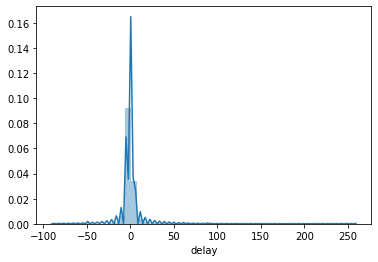

In [64]:
sns.distplot(y_train)

In [65]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,posting_date.day,posting_date.year,posting_date.month,document_create_date.1.day,document_create_date.1.year,document_create_date.1.month,delay
0,1,2,835,2,30170.67,34,9,2019,10,24,2019,10,9,2019,10,9,2019,10,-3
1,3,2,575,2,141.60,38,16,2019,11,9,2019,12,22,2019,11,22,2019,11,-7
2,4,2,835,2,32911.15,34,22,2019,9,7,2019,10,22,2019,9,22,2019,9,3
3,5,2,956,2,1520.30,21,13,2019,3,28,2019,3,13,2019,3,13,2019,3,-1
4,6,2,906,2,13677.04,23,22,2019,5,6,2019,6,22,2019,5,22,2019,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,34932,2,835,2,14583.68,34,1,2019,11,16,2019,11,1,2019,11,1,2019,11,-4
27995,34934,2,835,2,22231.79,34,28,2019,4,13,2019,5,28,2019,4,28,2019,4,1
27996,34936,2,819,2,7975.46,33,18,2019,3,22,2019,5,18,2019,3,18,2019,3,1
27997,34937,2,835,2,23082.32,34,30,2019,5,14,2019,6,30,2019,5,30,2019,5,-4


<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

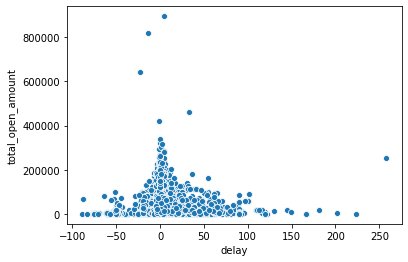

In [66]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")

<AxesSubplot:xlabel='delay', ylabel='buisness_year'>

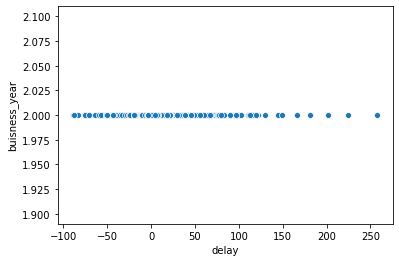

In [67]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="buisness_year")

### Feature selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

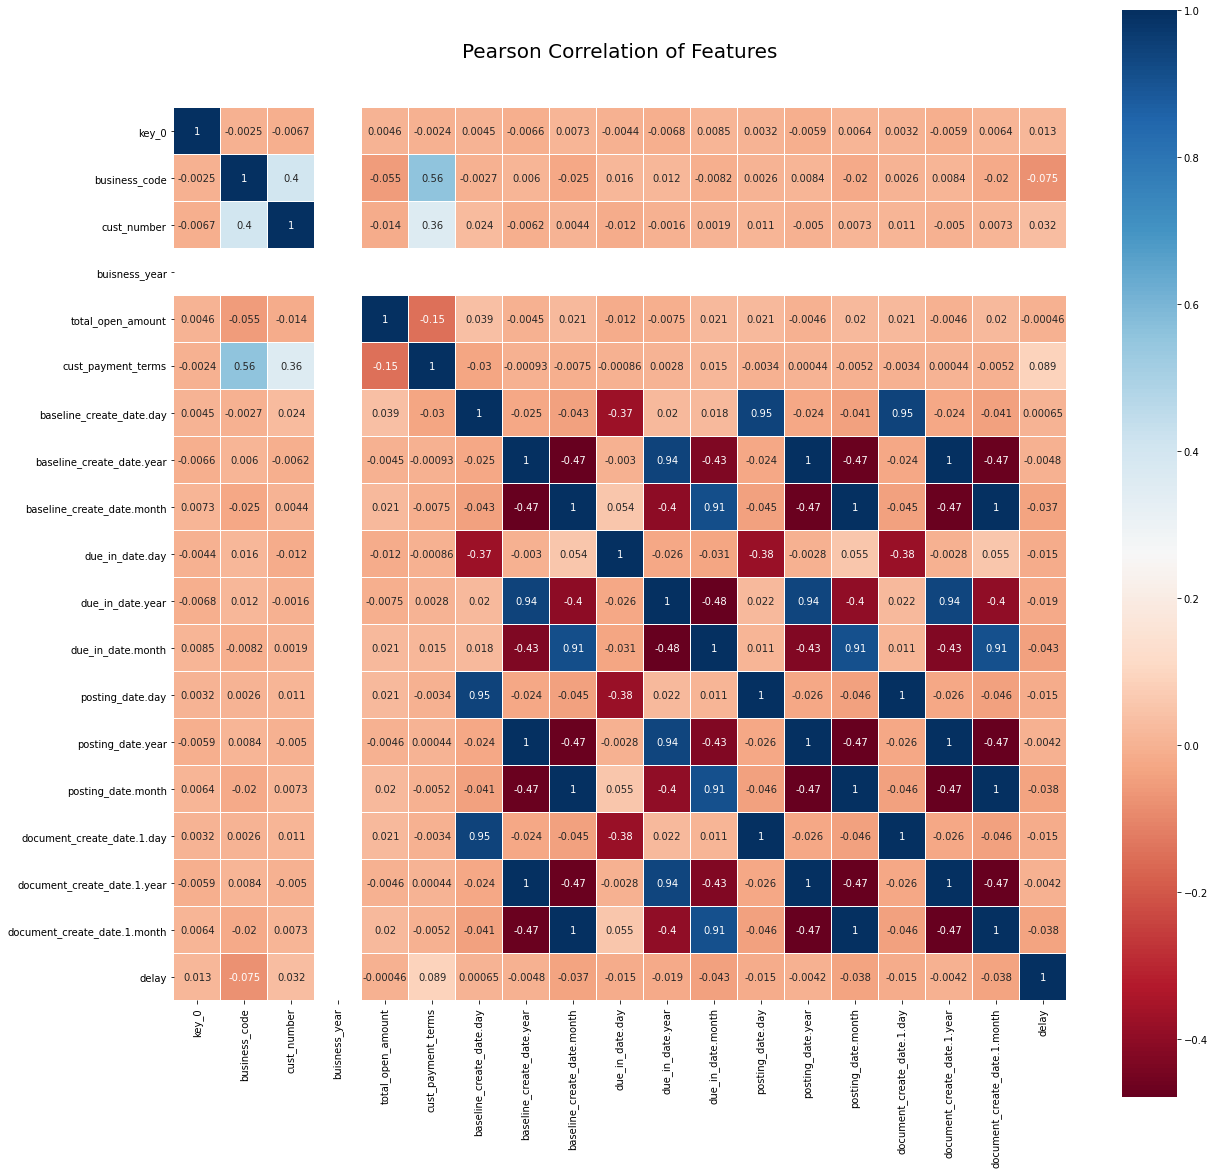

In [68]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

#sns.heatmap(X_train.merge(y_train , on = X_train.index ),annot=True)   

In [69]:
# also since all the columns have been converted to int/ float , we can use variance threshold -- ;
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.6)
sel.fit(X_train)

VarianceThreshold(threshold=0.6)

### Model Training

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_predict = model.predict(X_val)

In [72]:
res = pd.DataFrame( y_predict,columns=['RES'])
res

,RES
0,-1.148893
1,-0.920109
2,16.482535
3,2.438799
4,1.155998
...,...
5995,-3.104842
5996,16.449893
5997,-1.381681
5998,3.901195


In [73]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

11.18617757599515

In [74]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=8)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=0)

In [75]:
y_predict2 = regressor.predict(X_val)

In [76]:
mean_squared_error(y_val, y_predict2, squared=False)

8.987311114419308